<a href="https://colab.research.google.com/github/deepak10pk/Distracted_Driver_MultiAction_Classification/blob/master/Project_driver_distracted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip


--2019-12-29 05:10:01--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2019-12-29 05:10:06--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf1589eb823f0043266162283bd.dl.dropboxusercontent.com/cd/0/inline/AvLZjWTutCmwqCF3d4GVzRtfwe4gT5EPhtThAQKXX9NOY2wSaEfCFfN_6w8hKWWGXRUBhlqPMvyuD_e7uairMPGRxtAram5kC_sEHWk2DbKStg/file# [following]
--2019-12-29 05:10:07--  https://ucf1589eb823f0043266162283bd.dl.dropboxusercontent.com/cd/0/inline/AvLZjWTutCmwqCF3d4GVzRtfwe4gT5EPhtThAQKXX9NOY

In [3]:
!unzip state-farm-distracted-driver-detection.zip

Archive:  state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [4]:
!unzip imgs.zip

Archive:  imgs.zip
   creating: test/
  inflating: test/img_1.jpg          
  inflating: test/img_10.jpg         
  inflating: test/img_100.jpg        
  inflating: test/img_1000.jpg       
  inflating: test/img_100000.jpg     
  inflating: test/img_100001.jpg     
  inflating: test/img_100002.jpg     
  inflating: test/img_100003.jpg     
  inflating: test/img_100004.jpg     
  inflating: test/img_100005.jpg     
  inflating: test/img_100007.jpg     
  inflating: test/img_100008.jpg     
  inflating: test/img_100009.jpg     
  inflating: test/img_10001.jpg      
  inflating: test/img_100010.jpg     
  inflating: test/img_100011.jpg     
  inflating: test/img_100012.jpg     
  inflating: test/img_100013.jpg     
  inflating: test/img_100014.jpg     
  inflating: test/img_100016.jpg     
  inflating: test/img_100017.jpg     
  inflating: test/img_100018.jpg     
  inflating: test/img_100019.jpg     
  inflating: test/img_10002.jpg      
  inflating: test/img_100020.jpg     
  inflating:

In [0]:
import os

In [6]:
os.listdir()

['.config',
 'state-farm-distracted-driver-detection.zip',
 'driver_imgs_list.csv',
 'train',
 'imgs.zip',
 'test',
 'sample_submission.csv',
 'sample_data']

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import  OneHotEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

In [0]:
# defining the path and classes.
directory = '/content/train'
test_directory = '/content/test'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [0]:
# defining a shape to be used for our models.
img_size = 240

In [0]:
import cv2
import matplotlib.pyplot as plt

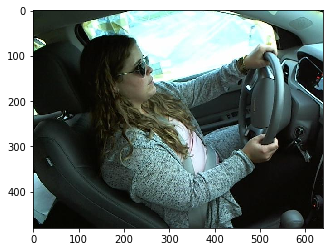

In [12]:
# Train class image for display.
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
        break
    break

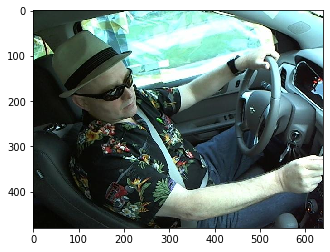

In [13]:
# Test class image for display.
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    test_array = RGB_img
    plt.imshow(RGB_img)
    plt.show()
    break

In [14]:
# checkking image size using shape.
print(img_array.shape)

(480, 640, 3)


(240, 240, 3)


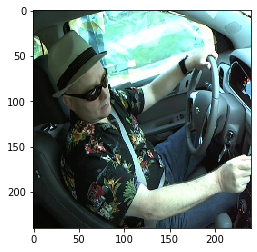

In [15]:
# trying out the resize image functionality
new_img = cv2.resize(test_array,(img_size,img_size))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [0]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img = cv2.resize(RGB_img,(img_size,img_size))
            training_data.append([new_img,class_num])

In [0]:
create_training_data()

In [18]:
print(len(training_data))

22424


In [0]:
import random

In [0]:
random.shuffle(training_data)
x = []
y = []

In [0]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [22]:
len(x),len(y)

(22424, 22424)

In [23]:
x[0].shape

(240, 240, 3)

In [24]:
len(x)

22424

In [25]:
x = np.array(x).reshape(-1,img_size,img_size,3)
x[0].shape

(240, 240, 3)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=96)

In [0]:
del x,y

In [28]:
import gc
gc.collect()

6930

In [0]:
from tensorflow.keras import utils

In [0]:
Y_train = utils.to_categorical(y_train,num_classes=10)
Y_test = utils.to_categorical(y_test,num_classes=10)

In [0]:
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [0]:
model = models.Sequential()
## CNN 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 64)      1

In [0]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callback = [callbacks.EarlyStopping(monitor='val_accuracy',patience=5)]
batch_size = 70
n_epochs = 15

In [35]:
results = model.fit(x_train,Y_train,
                    batch_size=batch_size,epochs=n_epochs,
                    verbose=1,
                    validation_data=(x_test,Y_test),
                    callbacks=callback)

Train on 15696 samples, validate on 6728 samples
Epoch 1/15
15696/15696 [==============================] - 68s 4ms/sample - loss: 0.8057 - accuracy: 0.7468 - val_loss: 0.1595 - val_accuracy: 0.9517
Epoch 2/15
15696/15696 [==============================] - 57s 4ms/sample - loss: 0.1315 - accuracy: 0.9610 - val_loss: 0.1063 - val_accuracy: 0.9664
Epoch 3/15
15696/15696 [==============================] - 57s 4ms/sample - loss: 0.0841 - accuracy: 0.9743 - val_loss: 0.1582 - val_accuracy: 0.9529
Epoch 4/15
15696/15696 [==============================] - 57s 4ms/sample - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.0427 - val_accuracy: 0.9877
Epoch 5/15
15696/15696 [==============================] - 57s 4ms/sample - loss: 0.0486 - accuracy: 0.9856 - val_loss: 0.0399 - val_accuracy: 0.9899
Epoch 6/15
15696/15696 [==============================] - 57s 4ms/sample - loss: 0.0466 - accuracy: 0.9853 - val_loss: 0.0466 - val_accuracy: 0.9866
Epoch 7/15
15696/15696 [==============================] -

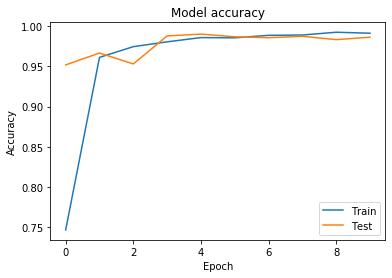

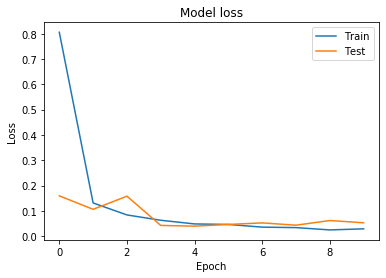

In [36]:
# Plot training & validation accuracy values
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Predict

In [0]:
pred= model.predict_classes(x_test)

Confusion Matrix

In [38]:
 !pip install scikit-plot

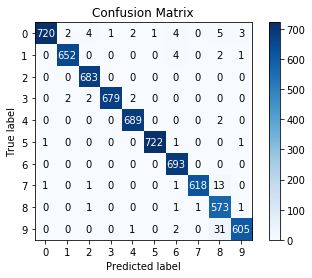

In [39]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skplt
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred) 


# Classification report

In [40]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       742
           1       0.99      0.99      0.99       659
           2       0.99      1.00      0.99       683
           3       1.00      0.99      0.99       685
           4       0.99      1.00      0.99       691
           5       1.00      1.00      1.00       725
           6       0.98      1.00      0.99       693
           7       1.00      0.97      0.99       634
           8       0.92      0.99      0.95       577
           9       0.99      0.95      0.97       639

    accuracy                           0.99      6728
   macro avg       0.99      0.99      0.99      6728
weighted avg       0.99      0.99      0.99      6728



# Testing Using random image

In [47]:
!pip install opencv-python

In [0]:
import cv2
random_filename = random.choice([
    x for x in os.listdir(test_directory)
    if os.path.isfile(os.path.join(test_directory, x))])
random_filename=test_directory+random_filename
print(random_filename)
img_array = cv2.imread(random_filename,cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
new_img = cv2.resize(RGB_img,(img_size,img_size))
print('Prediction : {}'.format(model.predict_classes(new_img.reshape(-1,img_size,img_size,4))))
plt.imshow(new_img)
plt.show()

#Using Transfer learning 

In [0]:
import pandas as pd 
import os
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from os import listdir, makedirs
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, VGG19, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.optimizers import SGD
from glob import glob
import cv2
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
import h5py
from PIL import Image
from sklearn.model_selection import train_test_split



In [0]:
def create_model():
    model = Sequential()
    # Use Batch Normalization for every conv and dense layers
    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape = (160, 120, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.33))
    model.add(Dense(32, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation = 'softmax')) 
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

In [0]:
model = create_model()

In [0]:
Train_dir=r'/content/train'


In [84]:

BATCH_SIZE = 32

RESOLUTION = 150
BATCH_SIZE=64

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
        Train_dir,
        target_size=(160,120),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training", color_mode='grayscale')

val_generator = val_datagen.flow_from_directory(
        Train_dir,
        target_size=(160, 120),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation",  color_mode='grayscale')

Found 15702 images belonging to 10 classes.
Found 6722 images belonging to 10 classes.


In [85]:
n_train = 15702
batch_size = 300
n_valid = 6722
history = model.fit_generator(
           train_generator,
           steps_per_epoch=n_train//batch_size,
           epochs=10,
           validation_data=val_generator,
           validation_steps=n_valid//batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 52 steps, validate for 22 steps
Epoch 1/10
52/52 [==============================] - 31s 590ms/step - loss: 1.9321 - accuracy: 0.3573 - val_loss: 3.3313 - val_accuracy: 0.1321
Epoch 2/10
52/52 [==============================] - 27s 515ms/step - loss: 0.9378 - accuracy: 0.7437 - val_loss: 4.9375 - val_accuracy: 0.1186
Epoch 3/10
52/52 [==============================] - 26s 495ms/step - loss: 0.5122 - accuracy: 0.8924 - val_loss: 5.1973 - val_accuracy: 0.1300
Epoch 4/10
52/52 [==============================] - 26s 493ms/step - loss: 0.2954 - accuracy: 0.9501 - val_loss: 9.1227 - val_accuracy: 0.1172
Epoch 5/10
52/52 [==============================] - 25s 483ms/step - loss: 0.1931 - accuracy: 0.9745 - val_loss: 9.0629 - val_accuracy: 0.1342
Epoch 6/10
52/52 [==============================] - 25s 479ms/step - loss: 0.1542 - accuracy: 0.9757 - val_loss: 8.5811 - val_accuracy: 0.1151
Epoch 7/10
52/52 [==============================] 

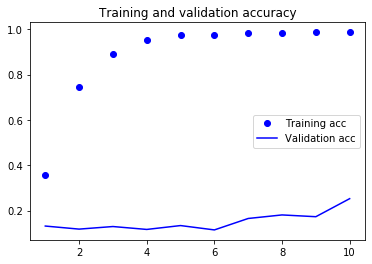

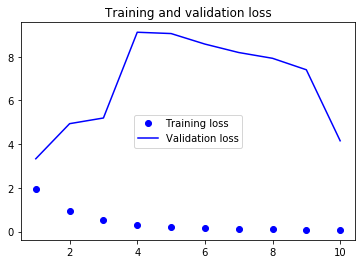

In [90]:
# Plot
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
